<a href="https://colab.research.google.com/github/vervainalthor/Hamoye-asessments/blob/master/HAMOYE_DATA_SCIENCE_TRACK_STAGE_C_ASSSESMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HAMOYE DATA SCIENCE TRACK STAGE C ASSSESMENT

## Name: Adekalu Adedayo
## student id: c

# following  initial instructions


In [1]:
import pandas as pd
df = pd.read_csv('Data_for_UCI_named.csv')

Dataset Description
Stability of the Grid System
Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demanddriven electricity production. For future grids with a high share of inϐlexible (i.e., renewable) energy source, the concept of demand response is a promising
solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classiϐication model to
predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.
Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+
It has 12 primary predictive features and two dependent variables.
Predictive features:
1. 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2'
to 'tau4' to the consumer nodes);
2. 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for
consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
3. 'g1' to 'g4': price elasticity coefϐicient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node,
'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');


Dependent variables:
1. 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
2. 'stabf': a categorical (binary) label ('stable' or 'unstable').


Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will
remain as the sole dependent variable (binary classiϐication).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set
(x_test).

Use scikit learn to train a random forest and extra trees classiϐier. And use xgboost and lightgbm to train an extreme boosting model and a light
gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set.


Also, to improve the Extra Trees Classiϐier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of


samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized


Cross Validation Search (RandomizedSearchCV).
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,

'min_samples_leaf': min_samples_leaf,
'min_samples_split': min_samples_split,
'max_features': max_features}

In [2]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
#check distribution of target variable
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

The dataset is already clean and the dataset does not seem too imbalanced and the performance of balancing was not stated in the instructions

In [5]:
#more preprocessing
X = df.drop(columns=['stab','stabf'])
y = df['stabf']

In [6]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df,columns=x_train.columns)
x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df,columns=x_test.columns)

## Question 1
You are working on a spam classiØcation system using regularized logistic regression. “Spam” is a positive class (y = 1) and
“not spam” is the negative class (y = 0). You have trained your classiØer and there are n = 2000 examples in the test set.
The confusion matrix of predicted class vs. actual class is:
What is the F1 score of this classiØer?

\begin{array}{rrrl}
F1 = 2 * &\frac{\displaystyle Precision * Recall }{\displaystyle Precision + Recall} 
\end{array}


\begin{array}{rrrl}
Precision = & \frac{\displaystyle TP}{\displaystyle TP+ FP} 
\end{array}

<br/>


\begin{array}{rrrl}
Recall = & \frac{\displaystyle TP}{\displaystyle TP + FN} 
\end{array}

In [8]:
tp1 = 355
tn1 = 120
fp1 = 1480
fn1 = 45
precision = tp1 / (tp1 + fp1)
recall= tp1 / (tp1 + fn1)
f1_score=  2*((precision* recall)/(precision+recall))

round(f1_score,4)

0.3177

### My Answer
0.3177

## Question 2
A classiØer predicts if insurance claims are fraudulent or not. The cost of paying a fraudulent claim is higher than the cost
of investigating a claim that is suspected to be fraudulent. Which metric should we use to evaluate this classiØer?\

### My Answer
Recall

## Quetsion 3
A data scientist is evaluating different binary classiØcation models. A false positive result is 5 times more expensive (from
a business perspective) than a false negative result. The models should be evaluated based on the following criteria:
1) Must have a recall rate of at least 80%
2) Must have a false positive rate of 10% or less
3) Must minimize business costs
After creating each binary classiØcation model, the data scientist generates the corresponding confusion matrix. Which
confusion matrix represents the model that satisØes the requirements?

In [9]:
tp1 = 82
tn1 = 9
fp1 = 2
fn1 = 18
precision = tp1 / (tp1 + fp1)
recall= tp1 / (tp1 + fn1)
f1_score=  2*((precision* recall)/(precision+recall))
print('recall: %f' % recall)

recall: 0.820000


### My Answer
TN = 98%, FP = 2%, FN = 18%, TP = 82%

it had the lowest percentage of false positive results whilst still maintaing a recall of above 80%


## Question 4

The ROC curve above was generated from a classiØcation algorithm. What can we say about this classiØer?
### My Answer
The model has no discrimination capacity to differentiate between the positive and the negative class

(a straight line roc curve is a representaion of random guessing)

## Question 5
Which of this is not a good metric for evaluating classiØcation algorithms for data with imbalanced class problems?
### My Answer
Accuracy

## Question 6
A random forest classiØer was used to classify handwritten digits 0-9 into the numbers they were intended to represent.
The confusion matrix below was generated from the results. Based on the matrix, which number was predicted with the
least accuracy?
### My Answer
8 (lowest amount of true positives)

## Question 7
What other hyperparameter optimization methods can you try apart from Random Search?
### My Answer
Grid Search

## Question 8
Which method can we use to best Øt a data in Logistic Regression?
### My Answer
Maximum Likelihood

## Question 9
What is the entropy of the target variable if its actual values are given as:
[1,0,1,1,0,1,0]

Shannon Entropy formula 
\begin{array}{rrrl}
H(X)= -\sum\limits_{i=1}^n p(x_i)log p(x_i)
\end{array}


in this question
 
$ p(x_1) = 3/7 ,  p(x_2) =4/7$

### My Answer
 -3/7 log(3/7) - 4/7 log(4/7) 

## Question 10
Which of the following is not an Ensemble model?
### My Answer
Decision Tree

## Question 11
A medical company is building a model to predict the occurrence of thyroid cancer. The training data contains 900
negative instances (people who don't have cancer) and 100 positive instances. The resulting model has 90% accuracy, but
extremely poor recall. What steps can be used to improve the model's performance? (SELECT TWO OPTIONS)
### My Answer
Generate synthetic samples/data using SMOTE

Collect more data for the positive case

## Question 12
You are building a classiØer and the accuracy is poor on both the training and test sets. Which would you use to try to
improve the performance?
### My Answer
Boosting

## Question 13
Why do we use weak learners in boosting?
### My Answer
To make the algorithm stronger(this was wrong)

## Question 14
You are developing a machine learning classiØcation algorithm that categorizes handwritten digits 0-9 into the numbers
they represent. How should you pre-process the label data?
### My Answer
One-hot encoding

## Question 15
What is the accuracy on the test set using the random forest classiØer? In 4 decimal places.

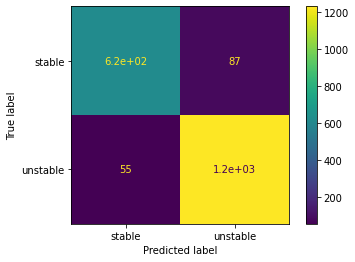

In [10]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
# fit the model on the whole dataset
model.fit(normalised_train_df,y_train)
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [11]:
new_predictions = model.predict(normalised_test_df)
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
accuracy

0.929

### My Answer
0.9295

## Question 16
What is the accuracy on the test set using the LGBM classiØer? In 4 decimal places.

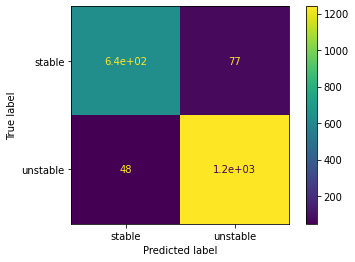

In [12]:
from lightgbm import LGBMClassifier
model4 = LGBMClassifier(random_state=1)
# fit the model on the whole dataset
model4.fit(normalised_train_df, y_train)
plot_confusion_matrix(model4, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [13]:
new_predictions4 = model4.predict(normalised_test_df)
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions4)
accuracy

0.9375

### My Answer
0.9375

## Question 17
What is the accuracy on the test set using the xgboost classiØer? In 4 decimal places.

In [14]:
from xgboost import XGBClassifier
model3 = XGBClassifier(random_state=1)
model3.fit(normalised_train_df, y_train)
new_predictions3 = model3.predict(normalised_test_df)
cnf_mat3 = confusion_matrix(y_true=y_test, y_pred=new_predictions3,labels=['stable','unstable'])
cnf_mat3

array([[ 603,  109],
       [  52, 1236]])

In [15]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions3)
accuracy

0.9195

### My Answer
0.9195

## Question 18

To improve the Extra Trees ClassiØer, you will use the following parameters (number of estimators, minimum number of
samples, minimum number of samples for leaf node and the number of features to consider when looking for the best
split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).
<br>
```
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,
'min_samples_leaf': min_samples_leaf,
'min_samples_split': min_samples_split,
'max_features': max_features}
```

<br>
Using the ExtraTreesClassiØer as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and
random_state = 1. What are the best hyperparameters from the randomized search CV?

In [16]:
#first extra tree
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1)
clf.fit(normalised_train_df,y_train)
new_predictions2 = clf.predict(normalised_test_df)
cnf_mat2 = confusion_matrix(y_true=y_test, y_pred=new_predictions2,labels=['stable','unstable'])

In [17]:
cnf_mat2

array([[ 606,  106],
       [  38, 1250]])

In [18]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions2)
accuracy

0.928

In [19]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split,
                       'max_features': max_features}
utility = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                            param_distributions=hyperparameter_grid,random_state=1)
result = utility.fit(normalised_train_df, y_train)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)

Best Score:  0.9241249999999999
Best Params:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


### My Answer
N_estimators = 1000 , min_samples_split = 2 , min_samples_leaf = 8, max_features = None

In [20]:
#improved Extratree classifier
clfe = ExtraTreesClassifier(random_state=1,n_estimators=1000,min_samples_split=2, min_samples_leaf= 8,max_features= None)
clfe.fit(normalised_train_df,y_train)
new_predictionse = clfe.predict(normalised_test_df)
cnf_mate = confusion_matrix(y_true=y_test, y_pred=new_predictionse,labels=['stable','unstable'])
cnf_mate

array([[ 619,   93],
       [  53, 1235]])

In [21]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictionse)
accuracy

0.927

## Question 19
Train a new ExtraTreesClassiØer Model with the new Hyperparameters from the RandomizedSearchCV (with
random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassiØer model
with no hyperparameter tuning?

### My Answer
Lower

## Question 20
Find the feature importance using the optimal ExtraTreesClassiØer model. Which features are the most and least
important respectively?

In [22]:
importance = clfe.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13724
Feature: 1, Score: 0.14051
Feature: 2, Score: 0.13468
Feature: 3, Score: 0.13542
Feature: 4, Score: 0.00368
Feature: 5, Score: 0.00534
Feature: 6, Score: 0.00543
Feature: 7, Score: 0.00496
Feature: 8, Score: 0.10256
Feature: 9, Score: 0.10758
Feature: 10, Score: 0.11306
Feature: 11, Score: 0.10954


the second feature **tau2** has the highest importance of 0.14051 and the fifth feature **p1** as the lowest importance 0f 0.00368

### My Answer
tau2, p1